In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (confusion_matrix, plot_confusion_matrix,
    accuracy_score, plot_roc_curve, roc_auc_score, recall_score,
    precision_score, f1_score, classification_report)


# Reading in the Data

In [2]:
citi = pd.read_csv('./JC-202012-citibike-tripdata.csv')

# Exploratory Data Analysis

In [3]:
citi.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [4]:
citi.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

In [5]:
citi['bikeid'].nunique()

576

In [6]:
citi['start station id'].nunique()

51

In [9]:
citi.nunique()

tripduration                2477
starttime                  11694
stoptime                   11694
start station id              51
start station name            51
start station latitude        51
start station longitude       51
end station id                58
end station name              58
end station latitude          58
end station longitude         58
bikeid                       576
usertype                       2
birth year                    56
gender                         3
dtype: int64

In [10]:
citi['starttime'].min()

'2020-12-01 00:02:50.1450'

In [11]:
citi['starttime'].max()

'2020-12-31 23:48:34.5750'

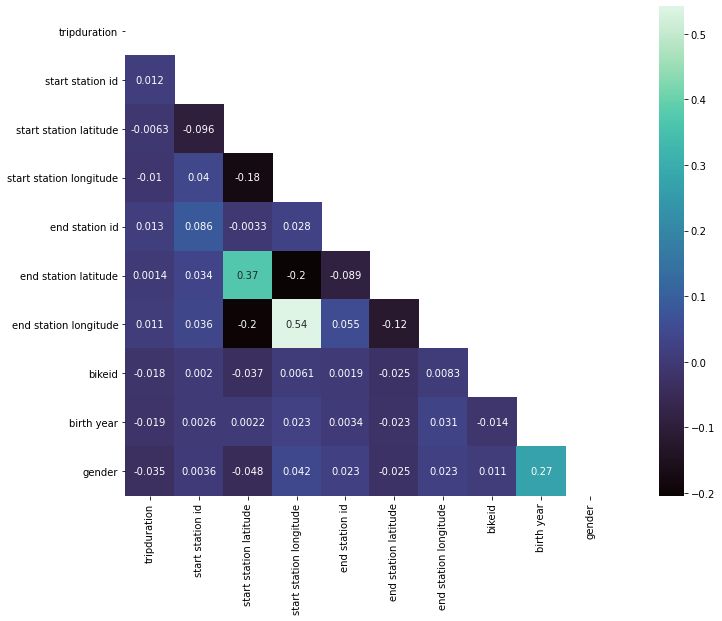

In [12]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = citi.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'mako', annot = True);

### The total data is for the month of December

## Trip Duration

In [13]:
citi['tripduration'].count()

11694

### There are about 11,700 total trips for the month of December in 2020

In [14]:
(citi['tripduration'].mean())/60

23.128900860840314

### The average trip is about 23 minutes long.

In [15]:
citi['tripduration']

0         146
1         572
2         387
3         188
4         594
         ... 
11689    1750
11690    1519
11691    1761
11692     637
11693    1607
Name: tripduration, Length: 11694, dtype: int64

In [16]:
# creating a new dataframe by grouping by the station name to find the mean
df_avg = pd.DataFrame(citi.groupby('start station name')['tripduration'].mean())
df_avg.sort_values(by ='tripduration', inplace=True)

### Changing seconds to minutes/hours

In [17]:
df_avg['tripduration_mins'] = pd.to_datetime(df_avg['tripduration'].round(), unit='s').dt.time

In [18]:
df_avg.rename(columns = {'tripduration':'tripduration_secs'}, inplace=True)
df_avg

,tripduration_secs,tripduration_mins
start station name,,
Manila & 1st,530.922764,00:08:51
Jersey & 3rd,531.606299,00:08:52
Brunswick St,534.778169,00:08:55
Jersey & 6th St,549.629787,00:09:10
Newark Ave,573.767241,00:09:34
Monmouth and 6th,641.664122,00:10:42
Dixon Mills,667.687500,00:11:08
Oakland Ave,676.686747,00:11:17
Essex Light Rail,684.844156,00:11:25


### Investigating outliers

In [19]:
citi['tripduration'].max()

2068550

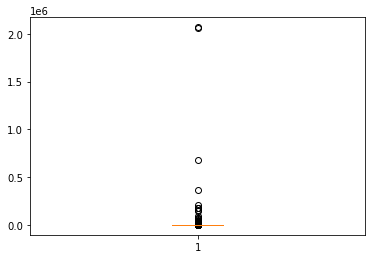

In [20]:
plt.boxplot(x = citi['tripduration']);

In [21]:
citi['tripduration'].sort_values().tail(50)

2641        8255
10486       8466
9933        8612
7259        8677
8504        8741
10482       8929
8031        9346
10793       9687
6192        9711
6409        9810
2567       10111
1855       10878
1611       11570
6520       11795
4542       12131
6063       12434
7214       12462
2026       12800
5561       13221
3490       13353
2629       13363
9268       13469
6096       13919
5555       14003
9140       15900
6250       16323
80         17454
10437      22442
10275      23472
8444       26853
711        32634
2102       34426
8598       37574
7535       39512
6712       45585
497        55150
8161       65764
6469       72474
242        77011
6015       90144
8000      144007
2691      158172
3792      179111
10345     179318
11532     181355
4687      208020
9674      363145
7355      674294
2343     2056977
4313     2068550
Name: tripduration, dtype: int64

In [22]:
# dropping trip duration above 70,000 seconds (20 hours)

citi = citi[citi['tripduration']<70000]

In [23]:
# Redoing Averages without outliers

In [24]:
(citi['tripduration'].mean())/60

13.947983905487543

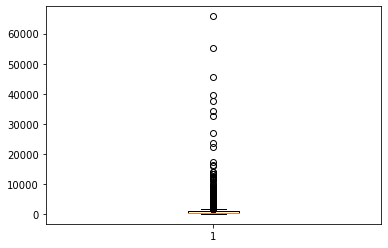

In [25]:
plt.boxplot(x = citi['tripduration']);

In [26]:
#max trip duration is now 18 hours
citi['tripduration'].max()

65764

### Average trip duration goes down to 13 MINS

In [27]:
# creating a new dataframe by grouping by the station name to find the mean
df_avg = pd.DataFrame(citi.groupby('start station name')['tripduration'].mean())
df_avg.sort_values(by ='tripduration', inplace=True)

### Changing seconds to minutes/hours

In [28]:
df_avg['tripduration_mins'] = pd.to_datetime(df_avg['tripduration'].round(), unit='s').dt.time

In [29]:
df_avg.rename(columns = {'tripduration':'tripduration_secs'}, inplace=True)
df_avg

,tripduration_secs,tripduration_mins
start station name,,
Manila & 1st,530.922764,00:08:51
Jersey & 3rd,531.606299,00:08:52
Brunswick St,534.778169,00:08:55
Jersey & 6th St,549.629787,00:09:10
McGinley Square,564.466063,00:09:24
Grove St PATH,571.108387,00:09:31
Newark Ave,573.767241,00:09:34
Monmouth and 6th,641.664122,00:10:42
Columbus Dr at Exchange Pl,644.567251,00:10:45


### The starting station with the longest average bike trips is Hoboken Ave at Monmouth St

# Subscriptions

In [30]:
citi.head(4)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,146,2020-12-01 00:02:50.1450,2020-12-01 00:05:16.1940,3202,Newport PATH,40.727224,-74.033759,3199,Newport Pkwy,40.728745,-74.032108,42308,Subscriber,1989,2
1,572,2020-12-01 00:11:57.3910,2020-12-01 00:21:30.2510,3640,Journal Square,40.733670,-74.062500,3280,Astor Place,40.719282,-74.071262,18568,Subscriber,1997,2
2,387,2020-12-01 00:14:49.3610,2020-12-01 00:21:16.8730,3640,Journal Square,40.733670,-74.062500,3194,McGinley Square,40.725340,-74.067622,44543,Subscriber,1960,1
3,188,2020-12-01 00:45:06.3680,2020-12-01 00:48:14.4280,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,43098,Subscriber,1998,1


In [31]:
#dummifying usertype
citi['usertype'] = pd.get_dummies(data = citi['usertype'], drop_first=True)

In [32]:
#renaming gender vars
citi['gender'].replace({0: 'unknown', 1: 'male', 2: 'female'}, inplace=True)

In [33]:
#dummifying gender
citi = pd.get_dummies(data = citi, columns=['gender'])

In [34]:
#checking my work
citi.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender_female,gender_male,gender_unknown
0,146,2020-12-01 00:02:50.1450,2020-12-01 00:05:16.1940,3202,Newport PATH,40.727224,-74.033759,3199,Newport Pkwy,40.728745,-74.032108,42308,1,1989,1,0,0
1,572,2020-12-01 00:11:57.3910,2020-12-01 00:21:30.2510,3640,Journal Square,40.733670,-74.062500,3280,Astor Place,40.719282,-74.071262,18568,1,1997,1,0,0
2,387,2020-12-01 00:14:49.3610,2020-12-01 00:21:16.8730,3640,Journal Square,40.733670,-74.062500,3194,McGinley Square,40.725340,-74.067622,44543,1,1960,0,1,0
3,188,2020-12-01 00:45:06.3680,2020-12-01 00:48:14.4280,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,43098,1,1998,0,1,0
4,594,2020-12-01 01:17:17.0110,2020-12-01 01:27:11.9400,3212,Christ Hospital,40.734786,-74.050444,3209,Brunswick St,40.724176,-74.050656,44723,1,1988,0,1,0


In [35]:
# Creating new column: age
citi['age'] = 2012  - citi['birth year']

In [36]:
#dummifying start station names
citi = pd.get_dummies(data=citi, columns=['start station name'])

In [37]:
features = citi.drop(columns = ['starttime','stoptime',
                     'start station id','start station latitude',
                     'start station longitude','end station id',
                     'end station name','end station latitude',
                     'end station longitude','bikeid','usertype','birth year'])

In [38]:
features.head()

,tripduration,gender_female,gender_male,gender_unknown,age,start station name_5 Corners Library,start station name_Astor Place,start station name_Baldwin at Montgomery,start station name_Bergen Ave,start station name_Brunswick & 6th,...,start station name_Oakland Ave,start station name_Paulus Hook,start station name_Pershing Field,start station name_Riverview Park,start station name_Sip Ave,start station name_Union St,start station name_Van Vorst Park,start station name_Warren St,start station name_Washington St,start station name_York St
0,146,1,0,0,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,572,1,0,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,387,0,1,0,52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,188,0,1,0,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,594,0,1,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#usertype: subscriber = 1, customer = 0

In [40]:
# null model
citi['usertype'].value_counts(normalize=True)

1    0.804811
0    0.195189
Name: usertype, dtype: float64

### About 80% of the riders in December 2020 for Jersey City were Subscribers

# Modeling

In [42]:
features.head(1)

,tripduration,gender_female,gender_male,gender_unknown,age,start station name_5 Corners Library,start station name_Astor Place,start station name_Baldwin at Montgomery,start station name_Bergen Ave,start station name_Brunswick & 6th,...,start station name_Oakland Ave,start station name_Paulus Hook,start station name_Pershing Field,start station name_Riverview Park,start station name_Sip Ave,start station name_Union St,start station name_Van Vorst Park,start station name_Warren St,start station name_Washington St,start station name_York St
0,146,1,0,0,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Step 1: Split into training & testing sets
X = features
y = citi['usertype']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 50)

In [44]:
# Step 2: Instantiate our model.
lgr = LogisticRegression(max_iter=200)

# Step 3: Fit our model.
lgr.fit(X_train, y_train)

print(f'Logistic Regression Intercept: {lgr.intercept_}')
print(f'Logistic Regression Coefficient: {lgr.coef_}')

Logistic Regression Intercept: [-0.74687038]
Logistic Regression Coefficient: [[-5.17123841e-04  1.49819455e+00  1.65233034e+00 -3.81453388e+00
   6.89242829e-02 -1.79009730e-01  1.06150679e-01 -1.46658451e+00
  -5.39500559e-01  5.91170684e-01  9.08756832e-01 -1.09133741e+00
   4.85928108e-01  4.60785794e-02 -3.54810624e-01 -7.31328283e-03
  -3.28557740e-02 -3.97282083e-01  7.24373669e-01 -3.64857341e-01
  -3.36229473e-01  1.06688457e-01  7.70082059e-01  5.46450818e-01
  -8.92354841e-02  2.84988314e-01  3.18023055e-02 -6.92960275e-01
   2.53177127e-01 -5.97065275e-01 -3.72939351e-01  3.82651731e-01
  -3.40408036e-01  1.26776262e-01  2.57971809e-01 -5.07705837e-01
  -3.91069956e-01  6.43740897e-01 -1.60873845e-01 -3.58398827e-01
   3.77693622e-01  6.27521134e-01  8.89171117e-01  8.04339373e-01
   8.14636022e-02 -2.93306305e-01  9.79114764e-01  1.34897405e-01
  -5.43219213e-01 -5.05640175e-01 -6.85959820e-01 -3.00709848e-01
   1.05541398e-01 -4.66819818e-01 -1.64063874e-01  3.09616983e-0

In [45]:
lgr.score(X_train, y_train)

0.9055936073059361

In [46]:
lgr.score(X_test, y_test)

0.9007189318726464

In [47]:
#getting the exponents of coefficients () 
np.exp(lgr.coef_)

array([[0.99948301, 4.47360491, 5.21912798, 0.02204799, 1.07135509,
        0.83609776, 1.11198942, 0.23071214, 0.58303937, 1.80610155,
        2.48123602, 0.33576714, 1.62568312, 1.04715669, 0.70130624,
        0.99271339, 0.96767811, 0.6721444 , 2.0634383 , 0.69429569,
        0.71445914, 1.11258758, 2.15994349, 1.72711229, 0.91463017,
        1.32974649, 1.0323134 , 0.50009346, 1.28811142, 0.55042461,
        0.688707  , 1.46616732, 0.71147995, 1.13516301, 1.29430233,
        0.6018748 , 0.67633284, 1.90358871, 0.85139947, 0.69879432,
        1.4589159 , 1.872962  , 2.43311205, 2.23521937, 1.08487373,
        0.74579367, 2.66209861, 1.14441937, 0.58087528, 0.60311935,
        0.50360663, 0.74029254, 1.11131211, 0.62699305, 0.84868781,
        1.362903  ]])

In [48]:
c =np.exp(lgr.coef_[0])

In [49]:
df = pd.Series(dict(zip(X.columns, c))).to_frame()
df.columns = ['coef']
df.sort_values(by = 'coef', inplace=True, ascending=False)
df

,coef
gender_male,5.219128
gender_female,4.473605
start station name_Oakland Ave,2.662099
start station name_Brunswick St,2.481236
start station name_Morris Canal,2.433112
start station name_Newark Ave,2.235219
start station name_Grove St PATH,2.159943
start station name_Essex Light Rail,2.063438
start station name_Manila & 1st,1.903589
start station name_Montgomery St,1.872962


# Interpretation

**An increase of 1 sec in trip duration means that someone is about .99 times as likely to be a subscriber- ALL OTHER THINGS HELD CONSTANT.**

**If someone is starting their journey from Oakland Ave they are 2.662099 as likely to be a subscriber (all else held constant)**

**For each increase in 1 year of age, the user is 1.026424 as likely to be a subscriber, all else held equal**

**If you are a male, you are about 5x as likely to be a subscriber - all else held equal**
**If you are female, you are about 4x as likely to be a subscriber - all else held equal**

In [51]:
y_preds = lgr.predict(X_test)

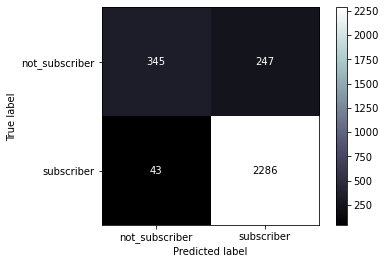

In [53]:
plot_confusion_matrix(lgr, X_test, y_test,
                     cmap ='bone',
                     display_labels=['not_subscriber', 'subscriber']);